<a href="https://colab.research.google.com/github/luciekash/Time-Series-Analysis-and-Forecasting/blob/main/Time_Series_Analysis_and_Forecastingd4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


**a) Specifying the Data Analysis Question**

Predict the number of taxi orders for the next hour.

**b) Defining the Metric for Success**


The project will be a success when we are able to RMSE metric on the test set of not more than 48

**c) Understanding the Context**

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the number of taxi orders for the next hour. Build a model for such a prediction.

**d) Recording the Experimental Design**

● Structure your notebook i.e. Defining the Problem, Data Importation, Exploration,...Recommendations etc.

● Download the data and resample it by one hour.

● Analyze the data.

● Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. ● Test the data using the test sample and provide a conclusion.

**e) Data Relevance**

The dataset provided is appropriate and relevant to the research question.



#**2.Data Importation, Exploration, Recommendation.**

In [12]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Import Data
Data = pd.read_csv('https://bit.ly/3p1QPAv')
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None


In [14]:
Data = pd.read_csv('https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0])

Data.sort_index(inplace=True)
print(Data.index.is_monotonic)
print(Data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


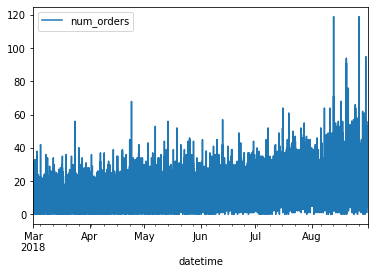

In [15]:
#  plot the data
Data.sort_index(inplace=True)
Data_day = Data['2018-03-01':'2018-08-31']
Data.plot();

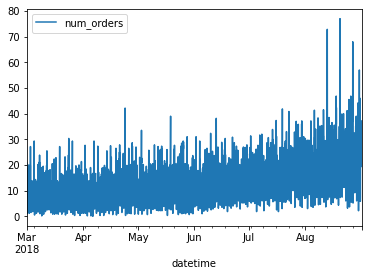

In [18]:
#resample it by one hour.
Data.sort_index(inplace=True)
Data = Data['2018-03-01':'2018-08-31'].resample('1H').mean()
Data.plot();

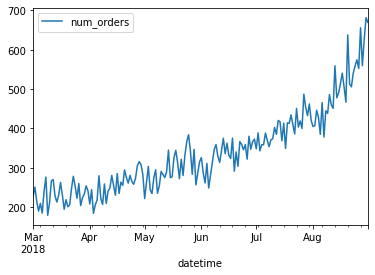

In [19]:
Data.sort_index(inplace=True)
Data_day = Data['2018-03-01':'2018-08-31'].resample('1D').sum()
Data_day.plot();

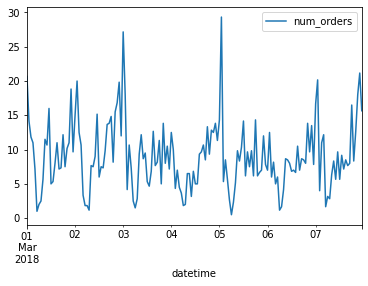

In [20]:
Data_week = Data['2018-03-01':'2018-03-07']
Data_week.plot();

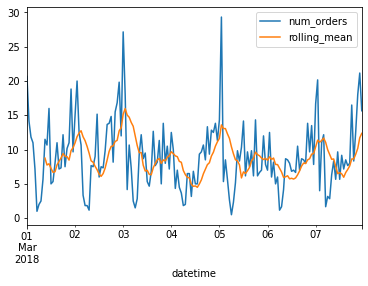

In [21]:
Data_week['rolling_mean'] = Data_week.rolling(10).mean()
Data_week.plot();

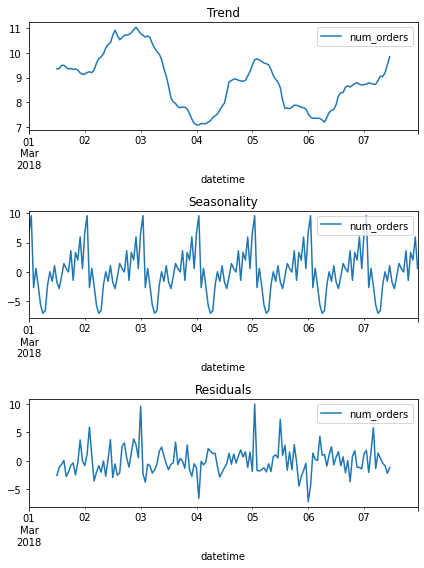

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Data_week = Data['2018-03-01':'2018-03-07']
decomposed = seasonal_decompose(Data_week)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout();

In [23]:
# Calendar features
# trends and seasonality are linked to a specific date and/or hour
Data['month'] = Data.index.month
Data['day'] = Data.index.day
Data['dayofweek'] = Data.index.dayofweek
Data['hour'] = Data.index.hour
Data.head()

,num_orders,month,day,dayofweek,hour
datetime,,,,,
2018-03-01 00:00:00,20.666667,3,1,3,0
2018-03-01 01:00:00,14.166667,3,1,3,1
2018-03-01 02:00:00,11.833333,3,1,3,2
2018-03-01 03:00:00,11.000000,3,1,3,3
2018-03-01 04:00:00,7.166667,3,1,3,4


In [24]:
# Lag features
# The previous values in the time series will tell you whether there is an increase or decrease
# let's create previous value for each hour
Data['previous_hour'] = Data['num_orders'].shift(1)
Data.head()

,num_orders,month,day,dayofweek,hour,previous_hour
datetime,,,,,,
2018-03-01 00:00:00,20.666667,3,1,3,0,NaN
2018-03-01 01:00:00,14.166667,3,1,3,1,20.666667
2018-03-01 02:00:00,11.833333,3,1,3,2,14.166667
2018-03-01 03:00:00,11.000000,3,1,3,3,11.833333
2018-03-01 04:00:00,7.166667,3,1,3,4,11.000000


In [26]:
# Rolling mean
# The rolling mean feature sets the general trend of the time series
Data['rolling_mean'] = Data['num_orders'].rolling(2).mean()
Data.head()

,num_orders,month,day,dayofweek,hour,previous_hour,rolling_mean
datetime,,,,,,,
2018-03-01 00:00:00,20.666667,3,1,3,0,NaN,NaN
2018-03-01 01:00:00,14.166667,3,1,3,1,20.666667,17.416667
2018-03-01 02:00:00,11.833333,3,1,3,2,14.166667,13.000000
2018-03-01 03:00:00,11.000000,3,1,3,3,11.833333,11.416667
2018-03-01 04:00:00,7.166667,3,1,3,4,11.000000,9.083333


#**3.Data splitting**

In [27]:
# Import data splitting libraries
from sklearn.model_selection import train_test_split

# remove null values
Data.dropna(axis=0,inplace=True)
X = Data.drop('num_orders',axis=1)
y = Data['num_orders']

# split the Data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=0)
# print('\nX_train: ', X_train.shape, '\nX_test: ',X_test.shape, '\ny_train: ',y_train.shape, '\ny_test: ',y_test.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#**4. Data Modelling**

In [29]:
#Import model libraries
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# initializing our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=0)
rf_regressor = RandomForestRegressor(random_state=0)
lr_regressor = LinearRegression()

# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)
rf_y_pred = rf_regressor.predict(X_test)
lr_y_pred = lr_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, dec_y_pred)))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, rf_y_pred)))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, lr_y_pred)))

SVM RMSE: 0.1291193931832255
KNN RMSE: 1.969514388905188
Decision Tree RMSE: 0.9454051246281685
Random Forest RMSE: 0.6778111675709259
Linear Regression RMSE: 1.3975302023674742e-14


The best model was the SVM model with an RMSE 0.13

In [30]:
test_Data = X_test
test_Data['num_orders'] = y_test
test_Data['pred_orders'] = lr_y_pred
test_Data.head()

,month,day,dayofweek,hour,previous_hour,rolling_mean,num_orders,pred_orders
datetime,,,,,,,,
2018-05-07 16:00:00,5,7,0,16,10.333333,15.416667,20.500000,20.500000
2018-04-30 12:00:00,4,30,0,12,10.500000,9.333333,8.166667,8.166667
2018-08-13 16:00:00,8,13,0,16,29.166667,26.583333,24.000000,24.000000
2018-05-12 00:00:00,5,12,5,0,19.833333,22.000000,24.166667,24.166667
2018-03-07 01:00:00,3,7,2,1,16.666667,18.416667,20.166667,20.166667


In [31]:
test_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 442 entries, 2018-05-07 16:00:00 to 2018-03-06 13:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          442 non-null    int64  
 1   day            442 non-null    int64  
 2   dayofweek      442 non-null    int64  
 3   hour           442 non-null    int64  
 4   previous_hour  442 non-null    float64
 5   rolling_mean   442 non-null    float64
 6   num_orders     442 non-null    float64
 7   pred_orders    442 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.1 KB


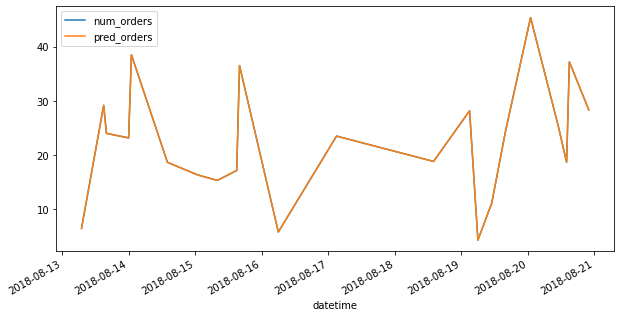

In [32]:
test_Data.index = pd.to_datetime(test_Data.index)
test_Data = test_Data.sort_index()
test_Data['2018-08-13':'2018-08-20'][['num_orders','pred_orders']].plot(figsize=(10,5));

From the above graphs it's evident the SVM model accurately predicted the number of orders per hour.


#**5.Summary of Findings**

SVM model was the best model that can be used to predict the number of orders.

**Recommendations**

To attract more drivers during peak hours, Sweet Lift Taxi company can rely on the SVM model to predict the number of orders for each hour